In [1]:
import numpy as np;
import pandas as pd;
from matplotlib import pyplot as plt;

df2 = pd.read_csv(r"C:\Users\Raider\Downloads\qda.csv");
df2

,X1,X2,y
0,-0.371420,1.570935,1
1,0.987527,2.924967,1
2,4.501290,4.148128,1
3,3.218695,1.998997,1
4,-0.999420,0.443463,1
...,...,...,...
595,-0.216922,3.264042,0
596,3.348868,-0.628553,0
597,3.692645,5.523132,0
598,4.303656,2.207923,0


In [4]:
X = df2.drop(['y'], axis = 1)
Y = df2.y

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
y_pred = qda.predict(x_test)
print("Predicted values: ", y_pred)
print("Score: ", qda.score(x_test, y_test))

Predicted values:  [1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0
 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1]
Score:  0.85


In [7]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
areaUnderROCCurve = metrics.roc_auc_score(y_test, y_pred)
print('True postitivity rate(sensitivity): ', tpr)
print('False postitivity rate(1-specificity): ', fpr)
print('Threshold: ', threshold)
print('Area under ROC curve: ', areaUnderROCCurve)

True postitivity rate(sensitivity):  [0.         0.83529412 1.        ]
False postitivity rate(1-specificity):  [0.         0.13684211 1.        ]
Threshold:  [2 1 0]
Area under ROC curve:  0.8492260061919505


Text(0.5, 1.0, 'Roc curve')

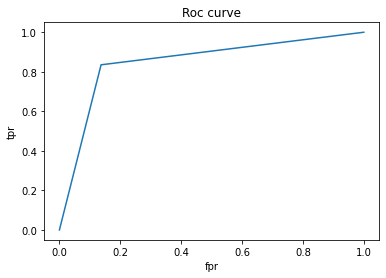

In [8]:
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc curve')